# Practice PS07: Outlier analysis

Author: <font color="blue">Alba Miró</font>

E-mail: <font color="blue">alba.miro02@estudiant.upf.edu</font>

Date: <font color="blue">22/11/2025</font>

In [1]:
# LEAVE THIS CELL AS-IS

import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE THIS CELL AS-IS

dft = pd.read_csv('annthyroid.csv', sep=',')
dfc = pd.read_csv('cardio.csv', sep=',')

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [3]:

total_thyroid = len(dft)
normal_thyroid = (dft['result'] == 0).sum() #0 normal
abnormal_thyroid = (dft['result'] == 1).sum() #1 abnormal

print(f"Thyroid dataset containing {total_thyroid} patients")
print(f"Normal: {normal_thyroid} ({normal_thyroid/total_thyroid*100:.2f}%)")
print(f"Abnormal: {abnormal_thyroid} ({abnormal_thyroid/total_thyroid*100:.2f}%)\n")

total_cardio = len(dfc)
normal_cardio = (dfc['result'] == 'normal').sum()
abnormal_cardio = (dfc['result'] == 'abnormal').sum()

print(f"Cardio dataset containing {total_cardio} patients")
print(f"Normal: {normal_cardio} ({normal_cardio/total_cardio*100:.2f}%)")
print(f"Abnormal: {abnormal_cardio} ({abnormal_cardio/total_cardio*100:.2f}%)")


Thyroid dataset containing 7200 patients
Normal: 0 (0.00%)
Abnormal: 0 (0.00%)

Cardio dataset containing 1831 patients
Normal: 1655 (90.39%)
Abnormal: 176 (9.61%)


<font size="+1" color="red">Replace this cell with your code to print the 10 normal exams in the `thyroid` dataset and the centroid of all normal exams, and the first 10 abnormal exams and the centroid of all abnormal exams.</font>

In [ ]:
normal_thyroid = dft[dft['result'] == 0]
abnormal_thyroid = dft[dft['result'] == 1]

feature_cols = [c for c in dft.columns if c != 'result']

print("First 10 normal exams (thyroid):")
print(normal_thyroid[feature_cols].head(10), '\n')

centroid_normal = normal_thyroid[feature_cols].mean()
print("Centroid of normal exams (thyroid):", '\n')
print(centroid_normal)

print("First 10 abnormal exams (thyroid):")
print(abnormal_thyroid[feature_cols].head(10), '\n')

centroid_abnormal = abnormal_thyroid[feature_cols].mean()
print("Centroid of abnormal exams (thyroid):")
print(centroid_abnormal)

First 10 normal exams (thyroid):
     f1       f2     f3     f4     f5     f6
0  0.73  0.00060  0.015  0.120  0.082  0.146
1  0.24  0.00025  0.030  0.143  0.133  0.108
2  0.47  0.00190  0.024  0.102  0.131  0.078
3  0.64  0.00090  0.017  0.077  0.090  0.085
4  0.23  0.00025  0.026  0.139  0.090  0.153
5  0.69  0.00025  0.016  0.086  0.070  0.123
6  0.85  0.00025  0.023  0.128  0.104  0.121
7  0.48  0.00208  0.020  0.086  0.078  0.110
8  0.67  0.00130  0.024  0.087  0.109  0.080
9  0.76  0.00010  0.029  0.124  0.128  0.097 

Centroid of normal exams (thyroid): 

f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64
First 10 abnormal exams (thyroid):
       f1       f2      f3      f4     f5      f6
10   0.62  0.01100  0.0080  0.0730  0.074  0.0980
19   0.50  0.06100  0.0096  0.0130  0.116  0.0110
27   0.78  0.02500  0.0090  0.0500  0.084  0.0600
43   0.61  0.00979  0.0040  0.0810  0.064  0.1260
84   0.56  0.00820  0.0200  0.0660  0.094 

<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the centroids, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

Based on the centroids, the features that provide much information are f2, f4 and f6 because they show some differences between normal and abnormal cases. The rest of the features remain really similar in both cases, indicating that they could not be that useful as the others. 

<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

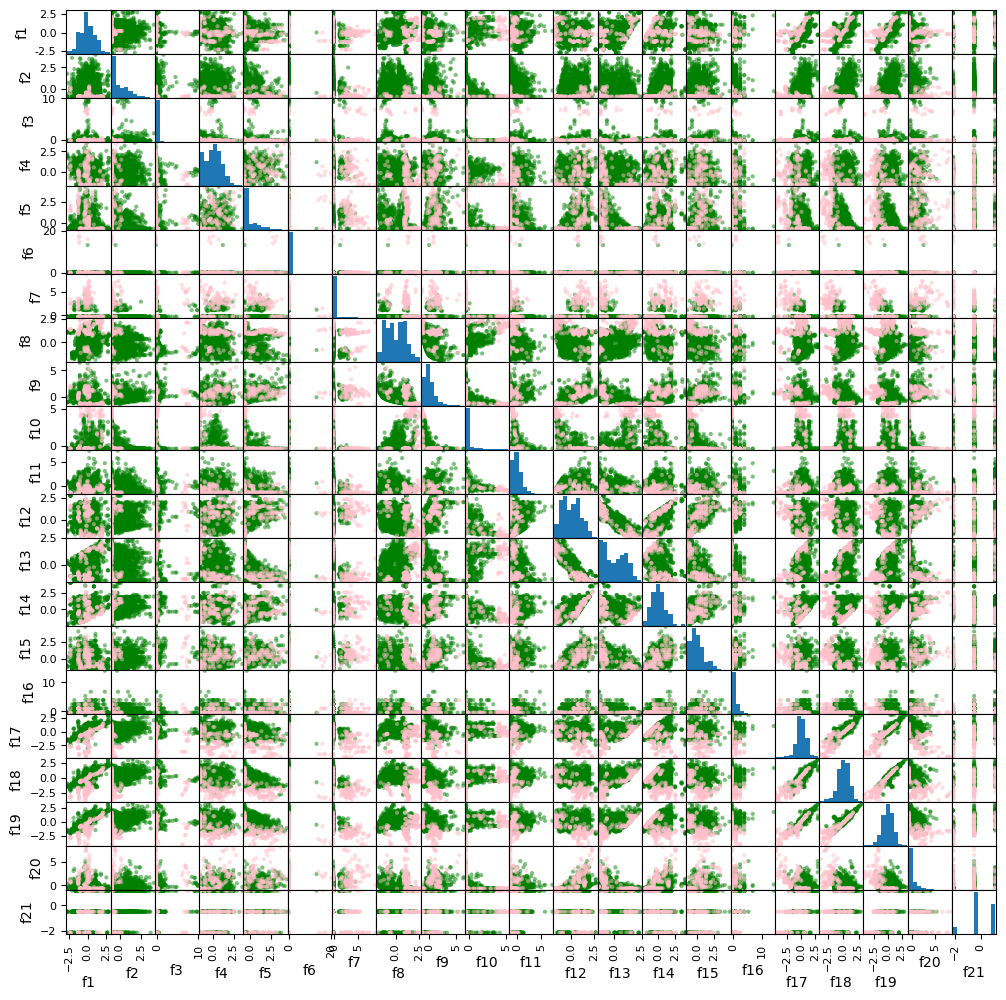

In [30]:
color_code = {'abnormal': 'pink', 'normal': 'green'}

colors = dfc['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(dfc, c=colors, figsize=(12, 12))

plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

We can indeed find some differenes between normal (green) and abnormal (pink) exams.
Abnormal points tend to occupy more extreme regions in several feature pairs, often in the tails of the distribtution ratger than in the central clusters, where the normal cases are concentrated.
For several feature combinations abnormal exams form more dispersed and and elongated clouds, while normal exams show more compact clusters.
In some projections, abnormal cases shift upward and downward compared to the normal cluster, suggesting that some shifts in the measurements. 

To sum up, although there is overlap, abnormal exams generally appear more scattered, less clustered and more often located at the boundar and not in the center.

# 1. Create isolation tree

## 1.1. Random dimension and random split

<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension".

In [31]:
def pick_random_dimension(df, columns_to_ignore):
    valid_columns = [col for col in df.columns if col not in columns_to_ignore]
    return random.choice(valid_columns)

In [32]:
# LEAVE THIS CODE AS-IS
# Testing code

print("Random dimensions for the 'thyroid' dataset")
print(pick_random_dimension(dft, ["result"]))
print(pick_random_dimension(dft, ["result"]))
print()

print("Random dimensions for the 'cardio' dataset")
print(pick_random_dimension(dfc, ["result"]))
print(pick_random_dimension(dfc, ["result"]))

Random dimensions for the 'thyroid' dataset
f1
f2

Random dimensions for the 'cardio' dataset
f20
f2


<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

In [33]:
def pick_random_split(df, dimension):
    min_val = np.min(df[dimension])
    max_val = np.max(df[dimension])
    
    return np.random.uniform(min_val, max_val)

In [34]:
# LEAVE THIS CODE AS-IS

print("Random splits according to 'f4' in the 'thyroid' dataset")
print(pick_random_split(dft, "f4"))
print(pick_random_split(dft, "f4"))
print()
print("Random splits according to 'f15' in the 'cardio' dataset")
print(pick_random_split(dfc, "f15"))
print(pick_random_split(dfc, "f15"))

Random splits according to 'f4' in the 'thyroid' dataset
0.4725203015941627
0.5726817576293152

Random splits according to 'f15' in the 'cardio' dataset
1.4712895697865618
-0.3875888267329224


## 1.2. Implement split data into two

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

In [35]:
def split_dataset(df, dimension, split):
    df_left = df[df[dimension] <= split]
    df_right = df[df[dimension] > split]
    
    return df_left, df_right

<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dataset, a dimension, and a cut-off, and split the dataset, then print the two pieces and check that it is working correctly. Also check that the sum of the sizes of the two pieces is the size of the original data.</font>

In [36]:
dimension = 'f1'
split_value = 0.5

left, right = split_dataset(dft, dimension, split_value)

print(f"Total rows in original dataset: {len(dft)}")
print(f"Rows with {dimension} <= {split_value}: {len(left)}")
print(f"Rows with {dimension} >  {split_value}: {len(right)}")
print(f"Sum of sizes: {len(left) + len(right)}")

Total rows in original dataset: 7200
Rows with f1 <= 0.5: 3169
Rows with f1 >  0.5: 4031
Sum of sizes: 7200


## 1.3. Create one isolation tree

In [37]:
# LEAVE THIS COLUMN AS-IS

dfti = dft.copy()
dfti.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(dft))])
display(dfti.head(5))

dfci = dfc.copy()
dfci.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(dfc))])
display(dfci.head(5))

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.015,0.120,0.082,0.146,0.0
1,P0002,0.24,0.00025,0.030,0.143,0.133,0.108,0.0
2,P0003,0.47,0.00190,0.024,0.102,0.131,0.078,0.0
3,P0004,0.64,0.00090,0.017,0.077,0.090,0.085,0.0
4,P0005,0.23,0.00025,0.026,0.139,0.090,0.153,0.0


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f13,f14,f15,f16,f17,f18,f19,f20,f21,result
0,P0001,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,...,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,normal
1,P0002,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,...,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,normal
2,P0003,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,...,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,normal
3,P0004,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,...,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,normal
4,P0005,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,...,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [53]:
dfti["result"] = dfti["result"].map({0.0: "normal", 1.0: "abnormal"})

def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    
    if len(data) <= min_items:
        return {"contents": data}
    else:
        dimension = pick_random_dimension(data, columns_to_ignore)
        
        split = pick_random_split(data, dimension)
        
        left_data, right_data = split_dataset(data, dimension, split)
        
        tree = {
            "left": isolation_tree(left_data, columns_to_ignore, min_items),
            "right": isolation_tree(right_data, columns_to_ignore, min_items),
            "dimension": dimension,
            "split": split
        }
        
        return tree


In [54]:
# LEAVE THIS CODE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [55]:
# LEAVE THIS CODE AS-IS

mytree_thyroid = isolation_tree(dfti, ['id', 'result'], 2000)
mytree_cardio = isolation_tree(dfci, ['id', 'result'], 200)

Print your tree using this function. It should look something like this:

```
:'internal node: f4 <= 0.30'
-<:'internal node: f3 <= 0.03'
--<:'internal node: f5 <= 0.07'
---<:'external node: 226 normal + 16 abnormal'
--->:'internal node: f6 <= 0.12'
----<:'external node: 4215 normal + 473 abnormal'
---->:'external node: 1641 normal + 34 abnormal'
-->:'external node: 576 normal + 11 abnormal'
->:'external node: 8 normal + 0 abnormal'
```

Given that the tree is created by a **randomized process**, your tree will be different.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [56]:
# LEAVE THIS CODE AS-IS

print("Tree built on the 'thyroid' dataset")
print(tree_to_nodes(mytree_thyroid))
print()

print("Tree built on the 'cardio' dataset")
print(tree_to_nodes(mytree_cardio))
print()

Tree built on the 'thyroid' dataset
:'internal node: f1 <= 0.49'
-<:'internal node: f2 <= 0.37'
--<:'internal node: f2 <= 0.15'
---<:'internal node: f4 <= 0.03'
----<:'external node: 9 normal + 20 abnormal'
---->:'internal node: f6 <= 0.37'
-----<:'internal node: f2 <= 0.13'
------<:'internal node: f3 <= 0.03'
-------<:'internal node: f1 <= 0.10'
--------<:'external node: 23 normal + 5 abnormal'
-------->:'internal node: f4 <= 0.07'
---------<:'external node: 127 normal + 24 abnormal'
--------->:'internal node: f6 <= 0.31'
----------<:'internal node: f5 <= 0.17'
-----------<:'internal node: f3 <= 0.01'
------------<:'external node: 69 normal + 6 abnormal'
------------>:'internal node: f2 <= 0.05'
-------------<:'internal node: f1 <= 0.26'
--------------<:'external node: 488 normal + 18 abnormal'
-------------->:'external node: 1734 normal + 72 abnormal'
------------->:'external node: 1 normal + 2 abnormal'
----------->:'external node: 26 normal + 0 abnormal'
---------->:'external node:

<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [57]:
def get_max_tree_depth(tree):
    if "contents" in tree:
        return 0
    
    left_depth = get_max_tree_depth(tree["left"])
    right_depth = get_max_tree_depth(tree["right"])
    
    return 1 + max(left_depth, right_depth)

In [58]:
# LEAVE THIS CODE AS-IS
# Testing code

print("Depth of the random tree you built over the 'thyroid' dataset")
print(get_max_tree_depth(mytree_thyroid))
print()

print("Depth of the random tree you built over the 'cardio' dataset")
print(get_max_tree_depth(mytree_cardio))
print()

Depth of the random tree you built over the 'thyroid' dataset
14

Depth of the random tree you built over the 'cardio' dataset
18



# 2. Create isolation forests and find depth of items

An isolation forest will be simply a an array of isolation trees.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Create an isolation forest

In [59]:
def isolation_forest(df, columns_to_ignore, min_items, num_trees):
    forest = []
    for _ in range(num_trees):
        tree = isolation_tree(df, columns_to_ignore, min_items)
        forest.append(tree)
    return forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [60]:
# LEAVE AS-IS OR MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES
# If you change 'min_items' or 'num_trees', indicate here that you have changed them

min_items_thyroid = 50
num_trees_thyroid = 20

myforest_thyroid = isolation_forest(dfti, ['id', 'result'], min_items_thyroid, num_trees_thyroid)
print("The 'thyroid' forest has %d trees" % len(myforest_thyroid))

min_items_cardio = 50
num_trees_cardio = 20

myforest_cardio = isolation_forest(dfci, ['id', 'result'], min_items_cardio, num_trees_cardio)
print("The 'cardio' forest has %d trees" % len(myforest_cardio))

The 'thyroid' forest has 20 trees
The 'cardio' forest has 20 trees


In [61]:
# LEAVE THIS CODE AS-IS

print("Thyroid forest (first two trees)")
print(tree_to_nodes(myforest_thyroid[0]))
print(tree_to_nodes(myforest_thyroid[1]))
print()

print("Cardio forest (first two trees)")
print(tree_to_nodes(myforest_cardio[0]))
print(tree_to_nodes(myforest_cardio[1]))
print()

Thyroid forest (first two trees)
:'internal node: f6 <= 0.02'
-<:'internal node: f3 <= 0.02'
--<:'internal node: f4 <= 0.00'
---<:'external node: 0 normal + 2 abnormal'
--->:'internal node: f6 <= 0.01'
----<:'external node: 1 normal + 19 abnormal'
---->:'external node: 2 normal + 30 abnormal'
-->:'external node: 1 normal + 1 abnormal'
->:'internal node: f3 <= 0.08'
--<:'internal node: f1 <= 0.45'
---<:'internal node: f4 <= 0.24'
----<:'internal node: f2 <= 0.13'
-----<:'internal node: f1 <= 0.37'
------<:'internal node: f2 <= 0.05'
-------<:'internal node: f5 <= 0.10'
--------<:'internal node: f1 <= 0.11'
---------<:'external node: 29 normal + 6 abnormal'
--------->:'internal node: f2 <= 0.04'
----------<:'internal node: f6 <= 0.21'
-----------<:'internal node: f4 <= 0.09'
------------<:'internal node: f3 <= 0.02'
-------------<:'internal node: f2 <= 0.02'
--------------<:'internal node: f3 <= 0.00'
---------------<:'external node: 1 normal + 0 abnormal'
--------------->:'internal node

## 2.2. Find the average depth of an item

In [62]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [63]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("Shallow tree for thyroid, having maximum depth %d" % get_max_tree_depth(mytree_thyroid))
print_sample_depths(dfti, 5, mytree_thyroid)
print()

print("Shallow tree for cardio, having maximum depth %d" % get_max_tree_depth(mytree_cardio))
print_sample_depths(dfci, 5, mytree_cardio)
print()

Shallow tree for thyroid, having maximum depth 14
Depths for normal items
- id=P0223 is at depth 4/14
- id=P2473 is at depth 9/14
- id=P6033 is at depth 2/14
- id=P4364 is at depth 9/14
- id=P5584 is at depth 14/14
Depths for abnormal items
- id=P2340 is at depth 4/14
- id=P3274 is at depth 7/14
- id=P5694 is at depth 14/14
- id=P4094 is at depth 14/14
- id=P1406 is at depth 4/14

Shallow tree for cardio, having maximum depth 18
Depths for normal items
- id=P1323 is at depth 9/18
- id=P0251 is at depth 7/18
- id=P0391 is at depth 13/18
- id=P0875 is at depth 14/18
- id=P0341 is at depth 10/18
Depths for abnormal items
- id=P1677 is at depth 4/18
- id=P1687 is at depth 9/18
- id=P1829 is at depth 18/18
- id=P1697 is at depth 14/18
- id=P1737 is at depth 18/18



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

The depth distributions show that both the thyroid and cardio shallow isolation trees separate normal and abnormal items at a wide range of depths. 

For the thyroid tree (with depth 14), both normal and abnormal exams appear at very shallow (2,4) to the maximum depth (14). This suggests that some abnormalities are detected early, but others require more splits to be detected.

For the cardio tree (with max depth 18), a similar pattern is present. Normal exams span mid to deeper levels (7,14) while abnormal items also appear both shallow (4) and extremely deep (18). This suggests the same as before. 


<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [64]:
def find_average_depth(forest, column_name, value):
    depths = []
    for tree in forest:
        d = find_element_depth(tree, column_name, value)
        if d is not None:
            depths.append(d)
    if len(depths) == 0:
        return None
    return sum(depths) / len(depths)

In [65]:
# LEAVE AS-IS

def test_random_elements(df, forest):
    for result in ['normal', 'abnormal']:
        print("Average depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(5))

        for random_id in sample:
            print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(forest, "id", random_id)))

        print()
        
print("Testing forest for the 'thyroid' dataset")
test_random_elements(dfti, myforest_thyroid)
print()

print("Testing forest for the 'cardio' dataset")
test_random_elements(dfti, myforest_thyroid)
print()



Testing forest for the 'thyroid' dataset
Average depths for normal items
- id=P4734 is at average depth 12.4
- id=P2771 is at average depth 15.4
- id=P4945 is at average depth 24.4
- id=P4329 is at average depth 17.1
- id=P4758 is at average depth 22.2

Average depths for abnormal items
- id=P3076 is at average depth 9.1
- id=P5185 is at average depth 18.9
- id=P1416 is at average depth 16.9
- id=P6294 is at average depth 20.0
- id=P3151 is at average depth 14.1


Testing forest for the 'cardio' dataset
Average depths for normal items
- id=P1719 is at average depth 17.4
- id=P4619 is at average depth 20.1
- id=P4711 is at average depth 22.6
- id=P4276 is at average depth 17.9
- id=P2664 is at average depth 16.1

Average depths for abnormal items
- id=P1514 is at average depth 16.2
- id=P4397 is at average depth 16.4
- id=P5234 is at average depth 9.1
- id=P3676 is at average depth 16.0
- id=P3756 is at average depth 16.9




<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

A way more efficient approach would be to, instead of calling find_element_depth for each element, compute the depths of all elements in a single traverslal per tree. This would significally reduce the running time of the code. 

The idea would be to, during a recursive traversal of each tree, pass along the current depth and, when reaching a leaf containing a subset of rows, assign that depth to all the ids in that leaf.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [66]:
# LEAVE AS-IS

SAMPLE_SIZE = 30

print("Thyroid dataset")
abnormal_thyroid_sample = list(dfti[dfti['result'] == 'abnormal']['id'].sample(SAMPLE_SIZE))
normal_thyroid_sample = list(dfti[dfti['result'] == 'normal']['id'].sample(SAMPLE_SIZE))
print("Normal point sample ids   : %s" % abnormal_thyroid_sample)
print("Abnormal point sample ids : %s" % normal_thyroid_sample)

print()

print("Cardio dataset")
abnormal_cardio_sample = list(dfci[dfci['result'] == 'abnormal']['id'].sample(SAMPLE_SIZE))
normal_cardio_sample = list(dfci[dfci['result'] == 'normal']['id'].sample(SAMPLE_SIZE))
print("Normal point sample ids   : %s" % abnormal_cardio_sample)
print("Abnormal point sample ids : %s" % normal_cardio_sample)


Thyroid dataset
Normal point sample ids   : ['P2105', 'P6973', 'P5913', 'P2332', 'P6294', 'P5668', 'P2076', 'P1621', 'P5686', 'P2571', 'P2554', 'P3571', 'P2703', 'P4701', 'P3264', 'P0216', 'P5085', 'P2855', 'P4601', 'P2588', 'P1519', 'P0861', 'P2922', 'P3518', 'P3577', 'P3007', 'P3854', 'P3863', 'P6257', 'P5543']
Abnormal point sample ids : ['P5652', 'P0386', 'P0902', 'P1352', 'P0931', 'P1544', 'P0034', 'P4518', 'P5283', 'P4541', 'P6814', 'P2450', 'P0346', 'P5075', 'P3234', 'P1272', 'P3487', 'P5191', 'P5609', 'P6674', 'P5674', 'P5876', 'P3317', 'P2593', 'P1240', 'P5820', 'P4824', 'P5732', 'P3385', 'P3359']

Cardio dataset
Normal point sample ids   : ['P1719', 'P1693', 'P1728', 'P1681', 'P1663', 'P1701', 'P1812', 'P1763', 'P1718', 'P1691', 'P1759', 'P1687', 'P1723', 'P1822', 'P1727', 'P1773', 'P1761', 'P1793', 'P1786', 'P1662', 'P1777', 'P1765', 'P1764', 'P1695', 'P1703', 'P1754', 'P1748', 'P1771', 'P1783', 'P1830']
Abnormal point sample ids : ['P0495', 'P1550', 'P1138', 'P0980', 'P0683

In [67]:
# LEAVE AS-IS

def print_average_depths(forest, sample):
    depths = []
    for i in sample:
        depth = find_average_depth(forest, 'id', i)
        depths.append(depth)
        print(" element id=%s is at average depth %2.f" % (i, depth))
    return depths

print("THYROID dataset")
print("Depths of items in the 'normal' sample:")
normal_depths_thyroid = print_average_depths(myforest_thyroid, normal_thyroid_sample)
print("Depths of items in the 'abnormal' sample:")
abnormal_depths_thyroid = print_average_depths(myforest_thyroid, abnormal_thyroid_sample)
print()

print("CARDIO dataset")
print("Depths of items in the 'normal' sample:")
normal_depths_cardio = print_average_depths(myforest_cardio, normal_cardio_sample)
print("Depths of items in the 'abnormal' sample:")
abnormal_depths_cardio = print_average_depths(myforest_cardio, abnormal_cardio_sample)
print()


THYROID dataset
Depths of items in the 'normal' sample:
 element id=P5652 is at average depth 21
 element id=P0386 is at average depth 26
 element id=P0902 is at average depth 23
 element id=P1352 is at average depth 16
 element id=P0931 is at average depth 20
 element id=P1544 is at average depth 18
 element id=P0034 is at average depth 23
 element id=P4518 is at average depth 22
 element id=P5283 is at average depth 17
 element id=P4541 is at average depth 22
 element id=P6814 is at average depth 18
 element id=P2450 is at average depth 24
 element id=P0346 is at average depth 13
 element id=P5075 is at average depth 20
 element id=P3234 is at average depth 21
 element id=P1272 is at average depth 26
 element id=P3487 is at average depth 24
 element id=P5191 is at average depth 17
 element id=P5609 is at average depth 24
 element id=P6674 is at average depth 23
 element id=P5674 is at average depth 14
 element id=P5876 is at average depth 17
 element id=P3317 is at average depth 14
 

Now, we create an histogram of the depths of normal and abnormal items.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

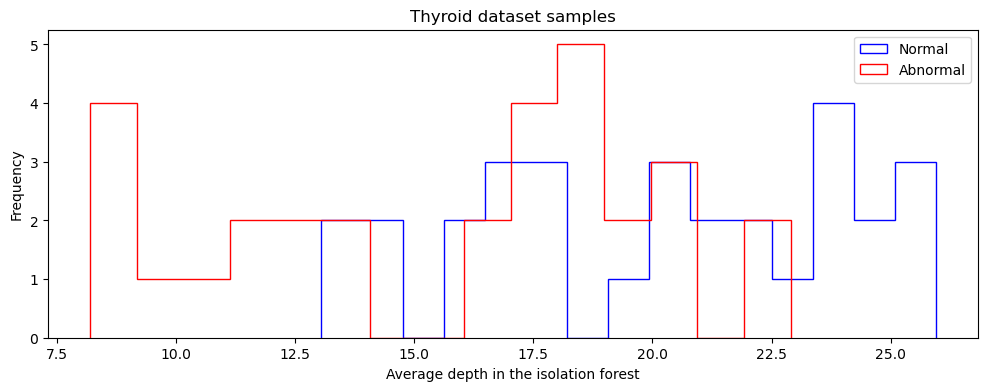

In [68]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths_thyroid, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths_thyroid, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.title('Thyroid dataset samples')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

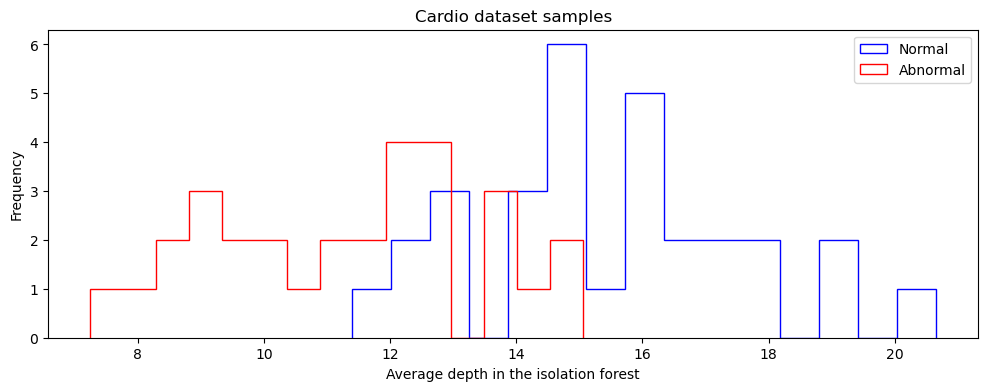

In [69]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths_cardio, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths_cardio, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.title('Cardio dataset samples')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in these histograms.</font>

In these historgrams we observe some overlapping in both cases. As the thyroid histogram has a wider range of overlapping between normal and abnormal depths, this indicates that this dataset is much more difficult to examine than the cardio one. The patterns between normal and abnormal exams are difficult to differentiate in some cases, that is why we encounter such overlapping. 

This is coherent with we saw in the shallow trees in exercise 2.2.

## 3.2. Compute outlier scores and conclude

In [70]:
# LEAVE THIS CODE AS-IS
# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [71]:
# LEAVE THIS CODE AS-IS

def outlier_score_factory(df):
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score_thyroid = outlier_score_factory(dfti)
outlier_score_cardio = outlier_score_factory(dfci)

# Compute the scores for thyroid
normal_scores_thyroid = [outlier_score_thyroid(d) for d in normal_depths_thyroid]
abnormal_scores_thyroid = [outlier_score_thyroid(d) for d in abnormal_depths_thyroid]

# Compute the scores for cardio
normal_scores_cardio = [outlier_score_cardio(d) for d in normal_depths_cardio]
abnormal_scores_cardio = [outlier_score_cardio(d) for d in abnormal_depths_cardio]


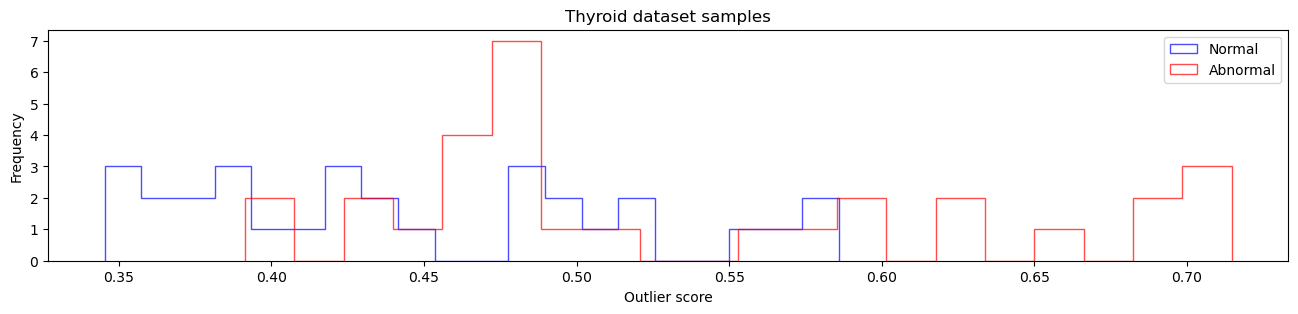

In [72]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores_thyroid, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores_thyroid, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.title("Thyroid dataset samples")
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

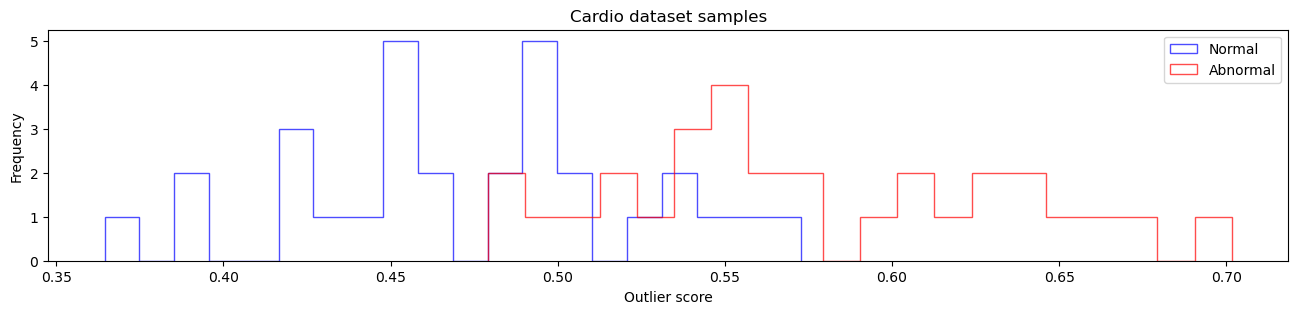

In [73]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores_cardio, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores_cardio, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.title("Cardio dataset samples")
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in these histogram.</font>

In the thyoird histogram, the normal scores (in blue) and the abnormal scores (in red) overlap much more heavily, especially between 0.4 and 0.53. The abnormal distribution also extends higher, but the overlap region is really wide. It indicates thta the dataset is harder to isolate.

On the contrarym the cardio dataset doesn't have that much of overlapping. Even though there is some between ~0.48 and ~0.58, it is not that much as in the thyroid case. This suggests that the isolation has performed better in the cardio dataset, but still some cases are difficult to distinguis between normal and abnormal.

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold for the `thyroid` dataset and the optional threshold for the `cardio` dataset. Indicate clearly what you are trying to do (binary search, exhaustive search, random search, etc.)</font>

In [75]:
#Exhaustive search over all unique outlier scores

def find_best_threshold(normal_scores, abnormal_scores):
    all_scores = np.array(normal_scores + abnormal_scores)
    unique_thresholds = np.unique(all_scores)

    best_threshold = None
    best_accuracy = -1

    total = len(normal_scores) + len(abnormal_scores)

    for t in unique_thresholds:
        normal_correct = sum(s <= t for s in normal_scores)
        abnormal_correct = sum(s > t for s in abnormal_scores)

        accuracy = (normal_correct + abnormal_correct) / total
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = t

    return best_threshold, best_accuracy


thyroid_threshold, thyroid_accuracy = find_best_threshold(normal_scores_thyroid, abnormal_scores_thyroid)
print("Best threshold for THYROID:", thyroid_threshold)
print("Accuracy:", thyroid_accuracy)


cardio_threshold, cardio_accuracy = find_best_threshold(normal_scores_cardio, abnormal_scores_cardio)
print("Best threshold for CARDIO:", cardio_threshold)
print("Accuracy:", cardio_accuracy)


Best threshold for THYROID: 0.4299913246519451
Accuracy: 0.7166666666666667
Best threshold for CARDIO: 0.5019642943632621
Accuracy: 0.85


<font size="+1" color="red">Replace this cell with your evaluation (accuracy, false positive rate, and false negative rate) of the optimal threshold of outlier score for the `thyroid` dataset and for the `cardio` dataset, separately. Include a brief commentary, in your own words, on how this method performs on both datasets.</font>

The thyroid threshold has an accuracy of approximately 72%. Its outlier score correctly classifies most cases, but there is a portion of exams that are misclassified. This indicates that there is an overlap between normla and abnormal thyroid exams.

The cardio threshold has a better accuracy, being it an 85%. The threshold performs better here, but it still has some misclassifications meaning that some normal and abnormal patterns are difficult to separate using only isolation.based outlier scores. 

<font size="+2" color="#003300">I hereby declare that I completed this practice myself, that my answers were not written by an AI-enabled code assistant, and that except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>